Nesse trabalho foi feita uma análise de dados contidos em planilhas de Excel como uma forma de introdução ao uso da bilbioteca Pandas.

In this work, an analysis of data contained in Excel spreadsheets was carried out as a way of introducing the use of the Pandas library.

In [1]:
import pandas as pd

In [5]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cidades/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cidades/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cidades/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cidades/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cidades/Salvador.xlsx")

In [7]:
df = pd.concat([df1,df2,df3,df4,df5])

In [8]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [11]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
196,Natal,2019-01-02,145.09,1036,2
27,Recife,2019-01-01,22.25,980,7
23,Fortaleza,2019-01-01,85.90,1004,5
133,Salvador,2019-03-02,153.71,1035,1
93,Fortaleza,2019-01-01,35.25,1003,5


In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
df["LojaID"] = df["LojaID"].astype("object")

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
df["Vendas"].mean()

122.61180089485458

In [18]:
df.dropna(how="all", inplace=True)

In [20]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
df["Receita"].max()

3544.0

In [23]:
df["Receita"].min()

3.34

In [24]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [25]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [26]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [27]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com datas**

In [29]:
df["Data"] = df["Data"].astype("int64")

In [30]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [32]:
df["Data"] = pd.to_datetime(df["Data"])

In [33]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [35]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
df["Ano_Venda"] = df["Data"].dt.year

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
5,Aracaju,2018-01-01,156.20,1522,1,156.20,2018
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019
68,Recife,2019-01-01,175.45,980,3,526.35,2019
21,Recife,2019-01-01,164.74,983,1,164.74,2019
16,Aracaju,2018-01-01,37.68,1522,10,376.80,2018


In [39]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
30,Fortaleza,2019-01-01,39.13,1005,6,234.78,2019,1,1
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16
70,Fortaleza,2019-01-01,79.57,1002,5,397.85,2019,1,1
13,Recife,2019-02-12,15.33,983,5,76.65,2019,2,12
61,Aracaju,2018-01-01,39.80,1520,6,238.80,2018,1,1


In [41]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
102,Natal,2019-01-02,40.84,1034,3,122.52,2019,1,2,366 days
38,Salvador,2019-01-01,165.34,1034,3,496.02,2019,1,1,365 days
9,Salvador,2019-01-01,127.92,1036,1,127.92,2019,1,1,365 days
131,Natal,2019-01-02,63.48,1037,3,190.44,2019,1,2,366 days
113,Aracaju,2018-01-01,23.05,1521,9,207.45,2018,1,1,0 days


In [46]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [53]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
36,Fortaleza,2019-01-01,36.31,1004,2,72.62,2019,1,1,365 days,1
39,Salvador,2019-01-01,165.95,1036,3,497.85,2019,1,1,365 days,1
80,Natal,2018-05-23,264.00,852,3,792.00,2018,5,23,142 days,2
41,Natal,2018-05-20,835.00,852,4,3340.00,2018,5,20,139 days,2
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days,1


In [57]:
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [55]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


Vizualização de **dados**

In [58]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

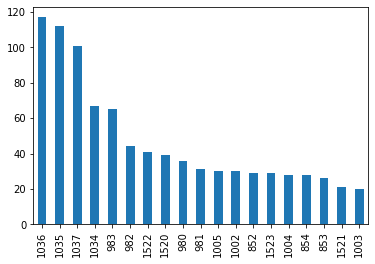

In [59]:
df["LojaID"].value_counts(ascending=False).plot.bar()

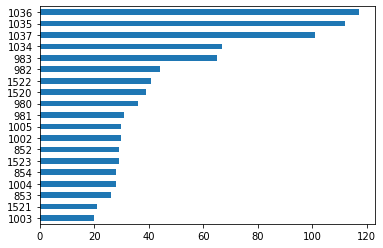

In [62]:
df["LojaID"].value_counts(ascending=True).plot.barh();

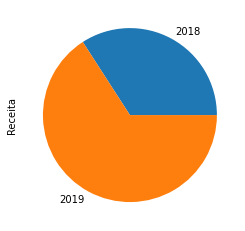

In [65]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [66]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

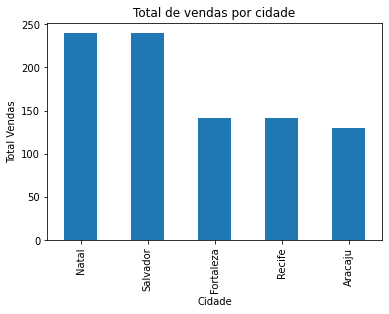

In [73]:
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

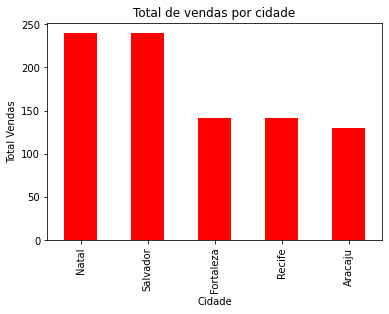

In [72]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [74]:
plt.style.use("ggplot")

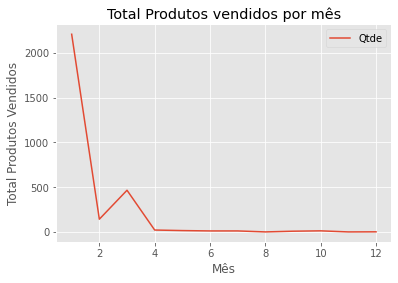

In [78]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [80]:
df_2019 = df[df["Ano_Venda"] == 2019]

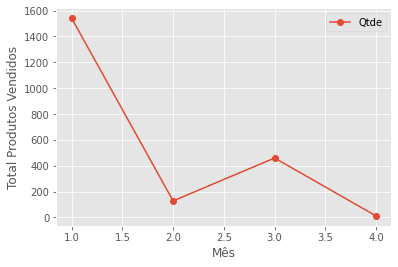

In [85]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [86]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

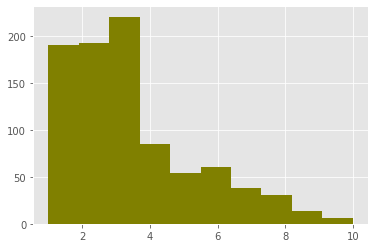

In [88]:
plt.hist(df["Qtde"], color="olive");

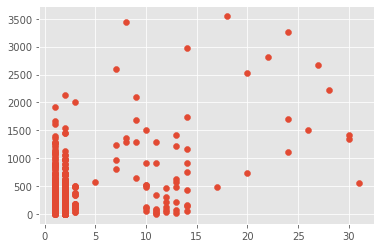

In [89]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])

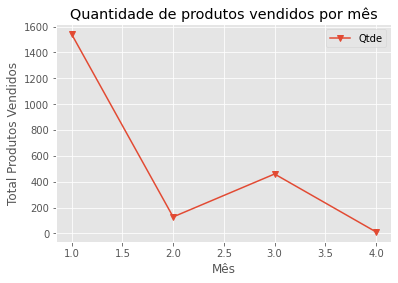

In [90]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")